### Fuzzy Logic

In [2]:
import numpy as np
import skfuzzy as fuzz  # type: ignore
from skfuzzy import control as ctrl  # type: ignore
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
air_temperature = ctrl.Antecedent(np.arange(30, 111, 1), "air_temperature")
soil_moisture = ctrl.Antecedent(np.arange(5, 31, 1), "soil_moisture")

In [4]:
watering_duration = ctrl.Consequent(np.arange(5, 61, 1), "watering_duration")

In [8]:
# Define fuzzy membership functions

# Set the membership functions for the temperature
air_temperature["cold"] = fuzz.trapmf(
    air_temperature.universe, [30, 30, 40, 47]
)  # trapezidal
air_temperature["cool"] = fuzz.trimf(
    air_temperature.universe, [40, 55, 70]
)  # triangular
air_temperature["normal"] = fuzz.trimf(air_temperature.universe, [60, 72, 84])
air_temperature["warm"] = fuzz.trimf(air_temperature.universe, [75, 87, 98])
air_temperature["hot"] = fuzz.trapmf(air_temperature.universe, [90, 95, 110, 110])

# Set the membership functions for the solid
soil_moisture["dry"] = fuzz.trapmf(soil_moisture.universe, [5, 5, 8, 12])
soil_moisture["moist"] = fuzz.trapmf(soil_moisture.universe, [10, 13, 18, 22])
soil_moisture["wet"] = fuzz.trapmf(soil_moisture.universe, [20, 25, 30, 30])

# Set the membership functions for the water
watering_duration["short"] = fuzz.trapmf(watering_duration.universe, [5, 5, 10, 20])

watering_duration["medium"] = fuzz.trapmf(watering_duration.universe, [10, 20, 40, 50])
watering_duration["long"] = fuzz.trapmf(watering_duration.universe, [40, 45, 60, 60])

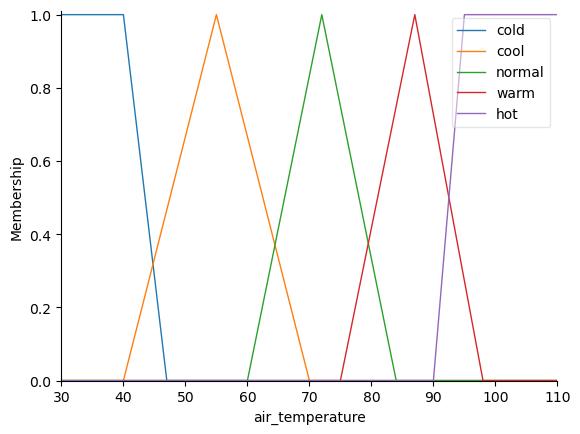

In [9]:
air_temperature.view()

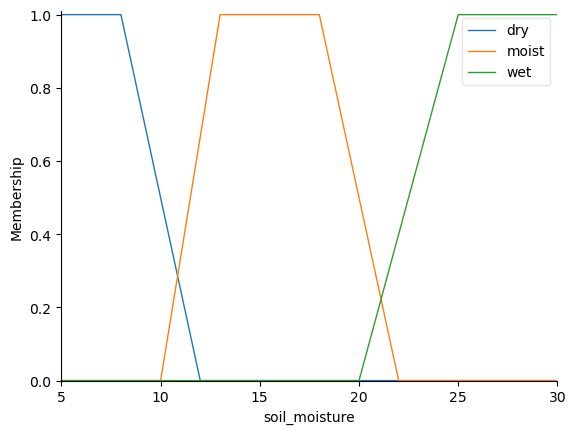

In [10]:
soil_moisture.view()

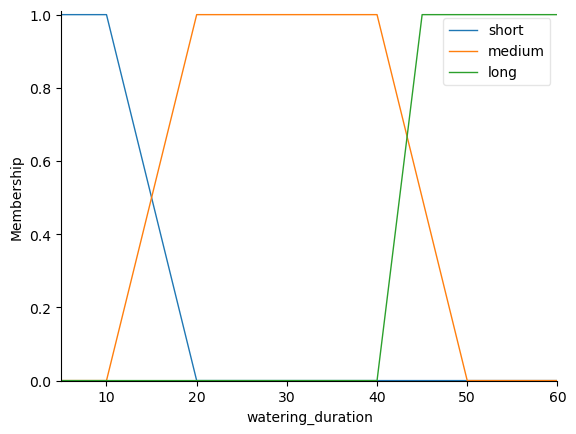

In [11]:
watering_duration.view()

In [13]:
# Create fuzzy control system
rule1 = ctrl.Rule( air_temperature["hot"] & soil_moisture["dry"], watering_duration["long"])
rule2 = ctrl.Rule(air_temperature["warm"] & soil_moisture["moist"], watering_duration["medium"])
rule3 = ctrl.Rule(air_temperature["warm"] & soil_moisture["dry"], watering_duration["long"])
rule4 = ctrl.Rule(air_temperature["hot"] & soil_moisture["moist"], watering_duration["medium"])

sprinkler_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

In [14]:
# Create fuzzy simulator
sprinkler_simulator = ctrl.ControlSystemSimulation(sprinkler_system)

In [15]:
# Set input values
sprinkler_simulator.input["air_temperature"] = 92
sprinkler_simulator.input["soil_moisture"] = 11

In [17]:
# Run simulator
# Evaluate the control system
sprinkler_simulator.compute()

In [18]:
# Get output value
watering_duration_value = sprinkler_simulator.output["watering_duration"]

In [19]:
# Print output value
print(f"The watering duration is {round(watering_duration_value, 1)}%")

The watering duration is 34.6%


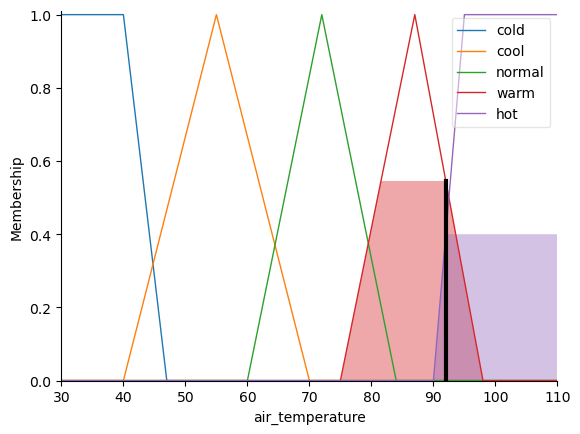

In [20]:
# Display fuzzy membership functions
# Visualize membership functions (optional)
air_temperature.view(sprinkler_simulator)  # 92

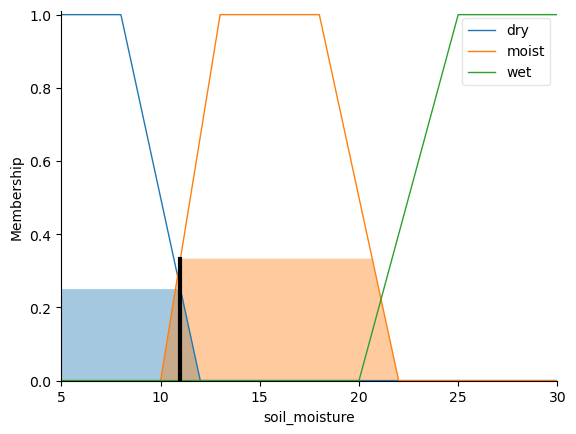

In [21]:
soil_moisture.view(sprinkler_simulator)  # 11

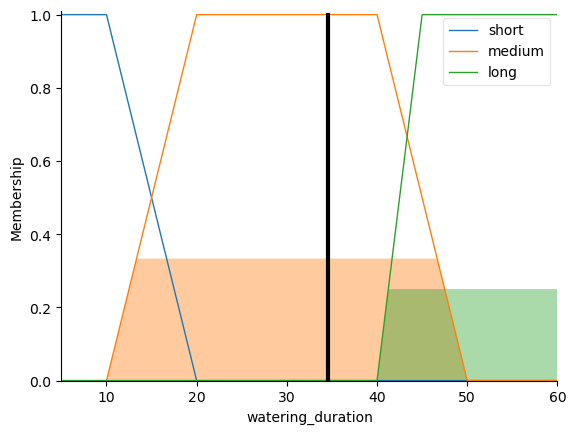

In [22]:
watering_duration.view(sprinkler_simulator)  # 34.6